NAME: JOSHUA Byaruhanga 


REG. NO.: 2024/HD05/21925U 


STUDENT NO.: 2400721925



Business problem:

There has been a revenue decline for the Portuguese bank, and they would like to know what actions to take. After investigation, we found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold a better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have a higher chance to subscribe for a term deposit and focus marketing effort on such clients.

The Data to be used to predict if a client will subscribe to A Term Deposit was obtained from https://archive.ics.uci.edu/dataset/222/bank+marketing
A classification approach is used to predict which clients are more likely to subscribe for term deposits.

Data Wrangling

Import Library

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use("fivethirtyeight")
import seaborn as sns

Data Loading
Loading dataset into df dataframe. 

In [2]:
df=pd.read_csv("bank-full.csv",delimiter=';',quotechar='"')

Dataset Exploration

Printing first 5 rows of the dataset

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Printing Last 5 rows of the dataset

In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


Checking the size of dataset

In [5]:
df.shape

(45211, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


This dataset contains 45211 rows and 17 columns. Amongst the columns, we have the target variable which is named 'y'.
This dataset is a mix of numerical and categorical variables.
The target variable is in categorical data type, this will be converted before the data preprocessing stage.

Age: This is age of client of Numeric type

Job : This is client's title of categorical type

Marital: This is marital status for the customer(Categorical)

Education: This field shows the edcuation level for the client(Categorical)

default: whether customer has deafaulted credit or not(Binary)

balance: customer average yearly balance(Numeric) housing: whether a customer has a housing loan or not (Binary)

loan: Whether customer has personal loan or not (Binary)

contact: whether customer was contacted using cellular or telephone(categorical)

day: Last day of the month (Numeric)

Month: last contact month of year (categorical)

duration: Last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric)

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

previous: number of contacts performed before this campaign and for this client (numeric)

poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

y: has the client subscribed a term deposit? (binary: "yes","no")

Data Cleaning


Missing Values

In [7]:
df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

This dataset doesn't contain missing values of all columns.

Duplicate Values

In [8]:
df.duplicated().any()

False

This dataset doesnt contains duplicate rows in it.

Checking for columns names 

In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Converting the target variables into 0s and 1s

In [10]:
df1=df

In [11]:
df1['y'] = df1['y'].map({'yes': 1, 'no': 0})

In [12]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


Data Exploration (EDA)

Numerical Features

In [13]:
num_cols = list(df1.select_dtypes("number").columns)
print("Num Features Length",len(num_cols), ":", num_cols)

Num Features Length 8 : ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']


We have 8 numerical features in the dataset.

Univariate

In [14]:
num_cols_skewness = df[num_cols].skew()

/tmp/ipykernel_14950/2632530206.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_title(str(num_cols[i]) + ' skewness: ' + str(round(num_cols_skewness[i], 2)))
/tmp/ipykernel_14950/2632530206.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_title(str(num_cols[i]) + ' skewness: ' + str(round(num_cols_skewness[i], 2)))
/tmp/ipykernel_14950/2632530206.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_titl

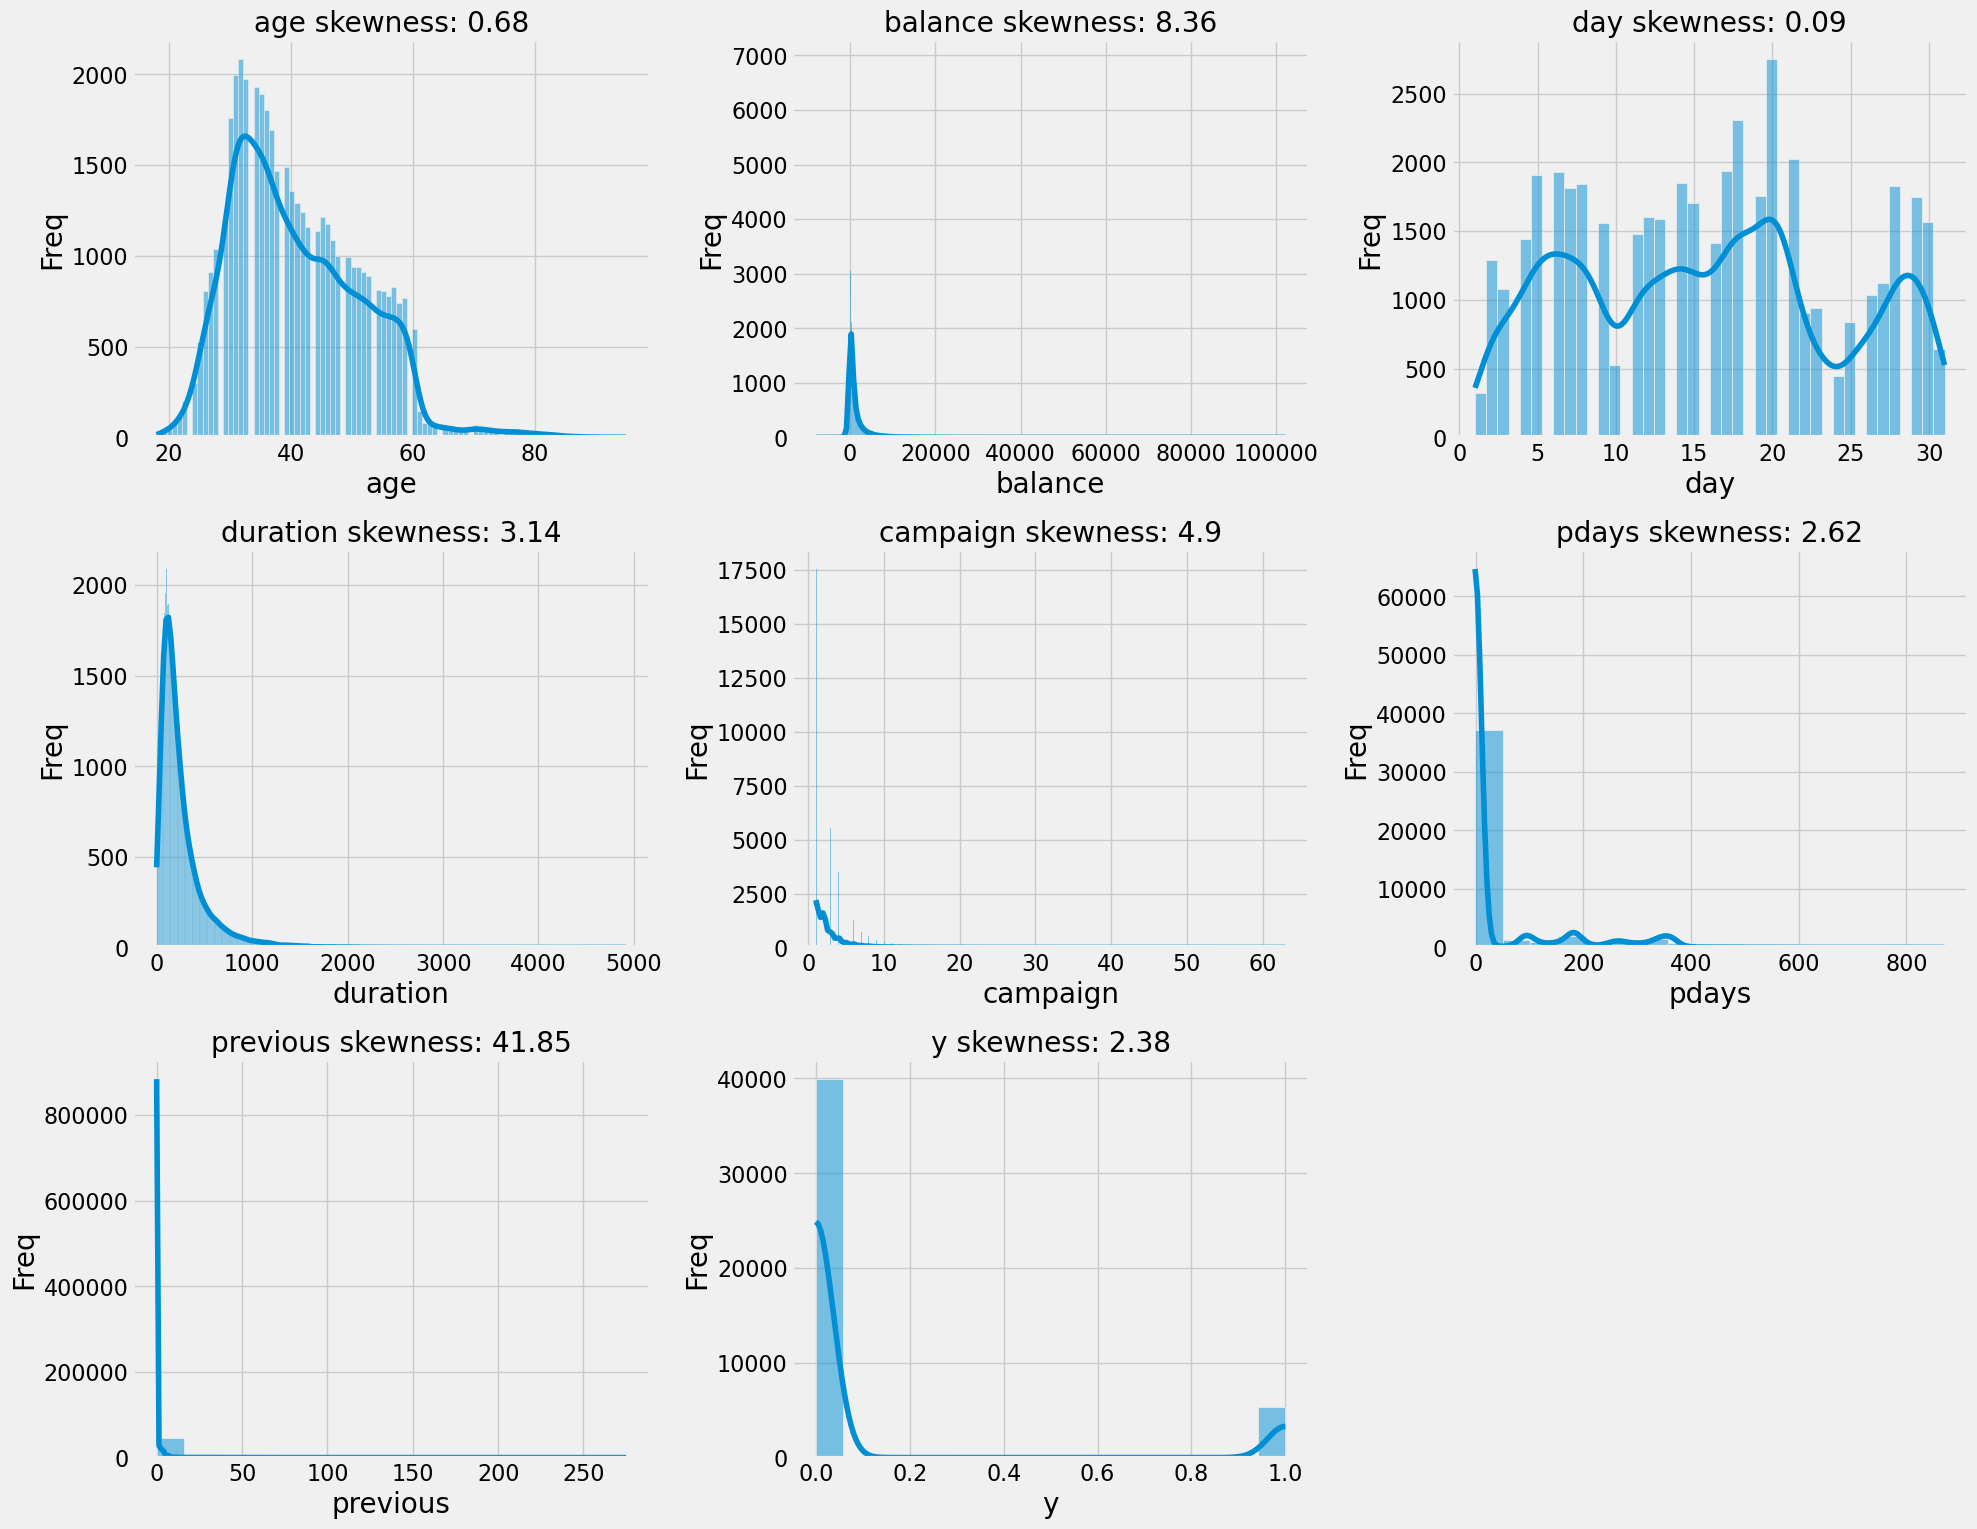

In [15]:
plt.figure(figsize=(20, 20))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//2, 3, i+1)
    ax = sns.histplot(
        df1[num_cols[i]],
        kde = True
    )
    ax.set_xlabel(str(num_cols[i]), fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
    ax.tick_params(labelsize=16)
    ax.set_title(str(num_cols[i]) + ' skewness: ' + str(round(num_cols_skewness[i], 2)))
plt.tight_layout()
plt.show()

Skewness:

day is approximately symmetric.

age is  moderately skewed.

duration, campaign, previous, target variable y, pdays and balance (right skewed) are highly skewed.


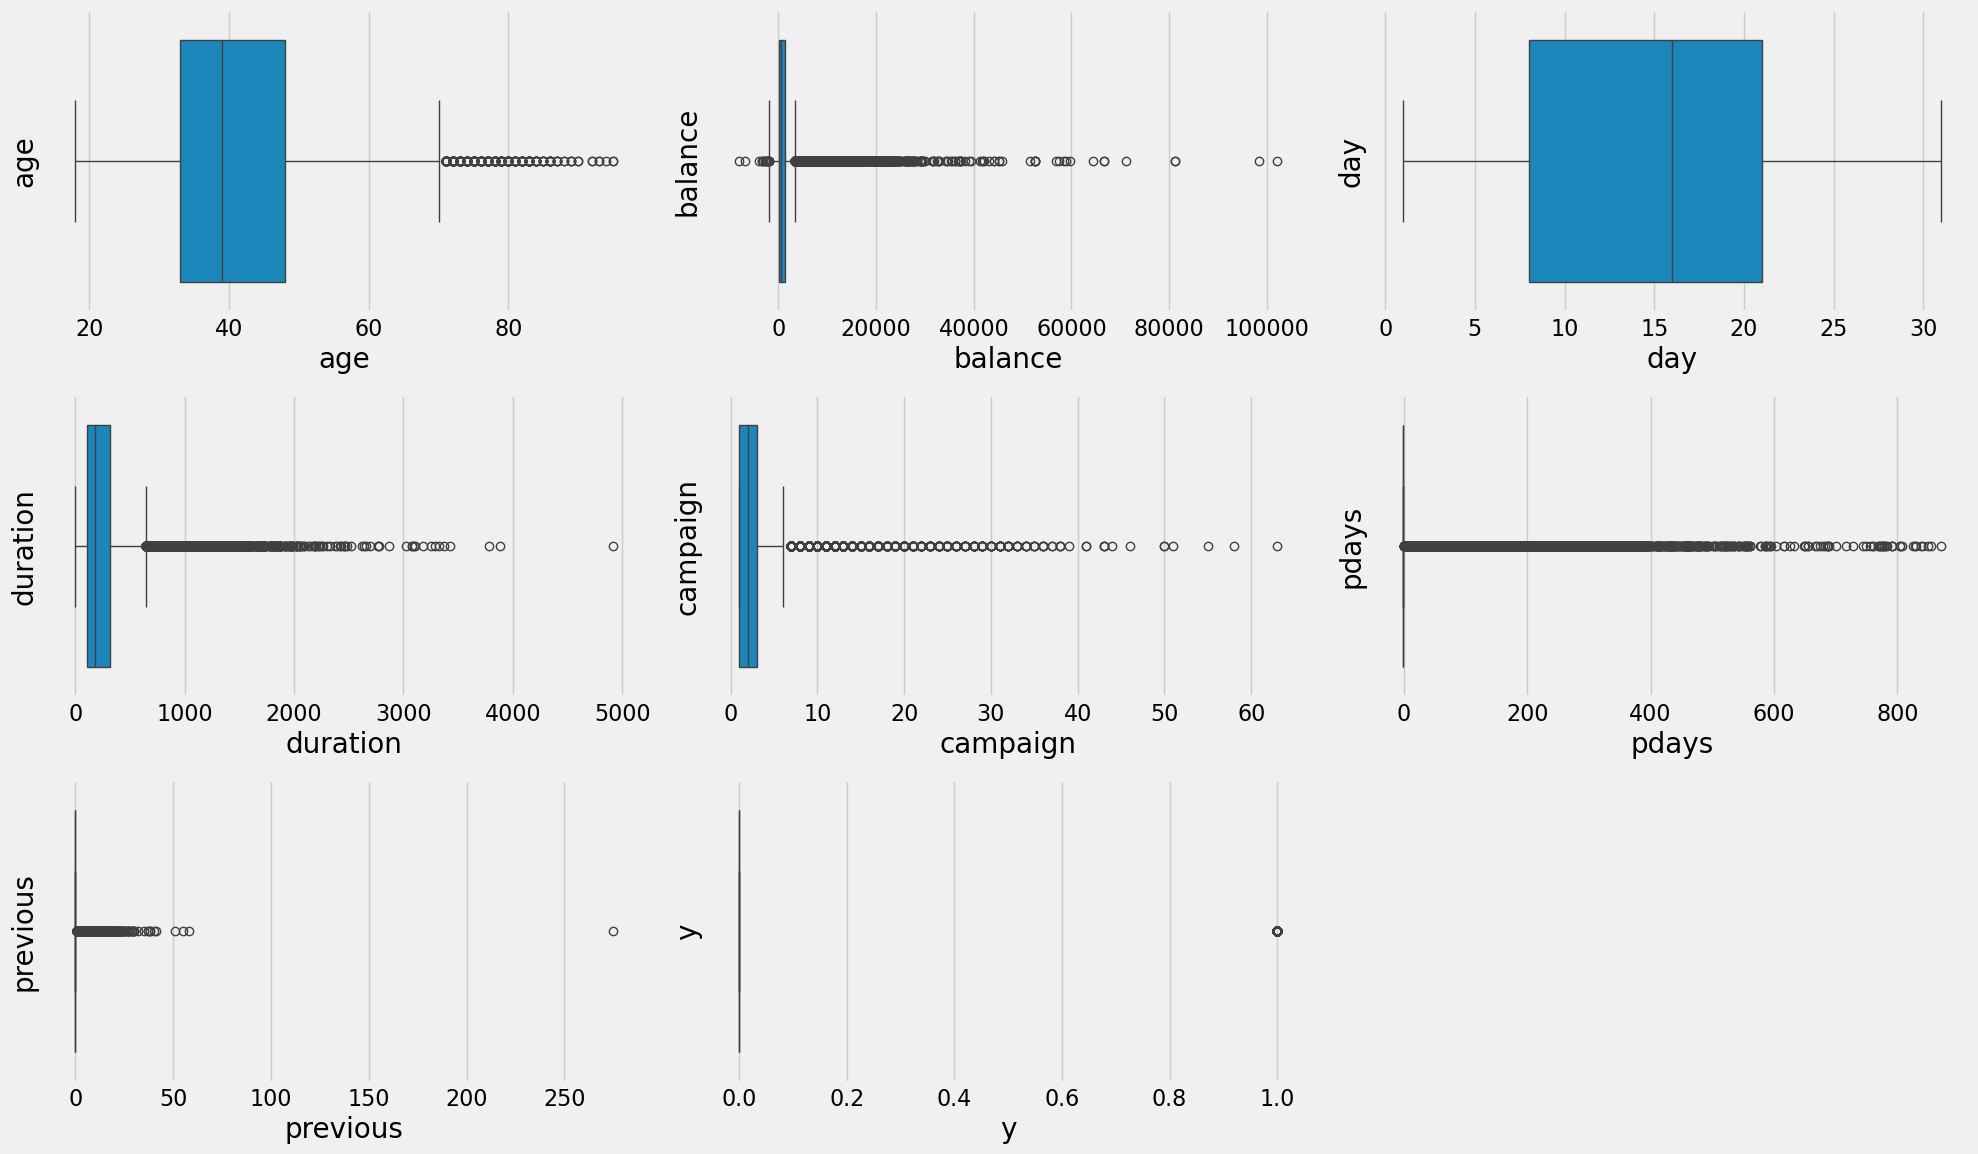

In [16]:
plt.figure(figsize=(20, 15))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//2, 3, i+1)
    ax = sns.boxplot(
        x = df1[num_cols[i]]
    )
    ax.set_xlabel(str(num_cols[i]), fontsize = 20)
    ax.set_ylabel(str(num_cols[i]), fontsize = 20)
    ax.tick_params(labelsize=16)
plt.tight_layout()

plt.show()

Age, duration,balance,campaign, pdays, previous contains outliers 

<Axes: xlabel='y', ylabel='count'>

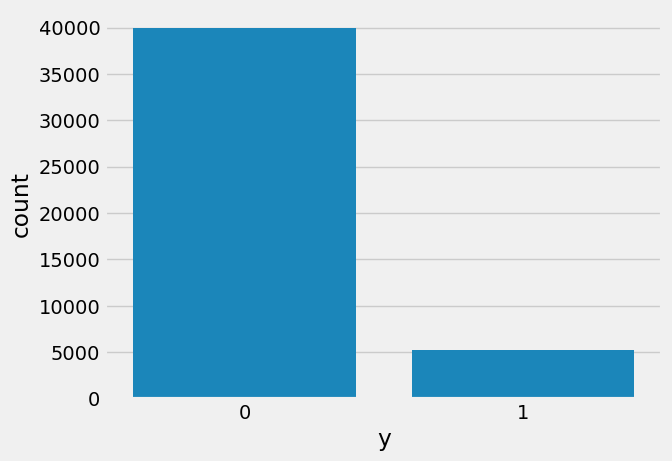

In [17]:
# Plotting the 'subscribed' frequency
sns.countplot(data=df1, x=df1['y'])

In [18]:
df1['y'].value_counts(normalize=True)

y
0    0.883015
1    0.116985
Name: proportion, dtype: float64

From the above analysis we can see that roughly 12% subscribed to term deposit

Analyzing the 'age' variable

/tmp/ipykernel_14950/1708864848.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['age']);


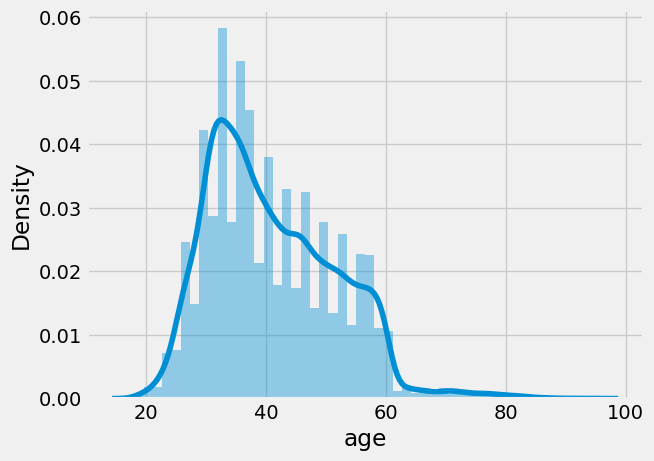

In [19]:
sns.distplot(df1['age']);

Most of the clients fall in the age group between 20-60.

In [20]:
df1.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [21]:
df1.groupby(['y'])[num_cols].median()

,age,balance,day,duration,campaign,pdays,previous,y
y,,,,,,,,
0,39.0,417.0,16.0,164.0,2.0,-1.0,0.0,0.0
1,38.0,733.0,15.0,426.0,2.0,-1.0,0.0,1.0


Both customers that subscribed and didn't subscribe has a median age of 38-39.
Customer who subscribed has a greater duration during the last contact by the bank which is approximately ~426 seconds 
Customer who didn't subscribe has a lower duration which is ~164 seconds 

In [22]:
#Correlation matrix
corr_column=['age','balance','day','duration','campaign','pdays','previous','y']
cor = df1[corr_column].corr()
cor

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


<Axes: >

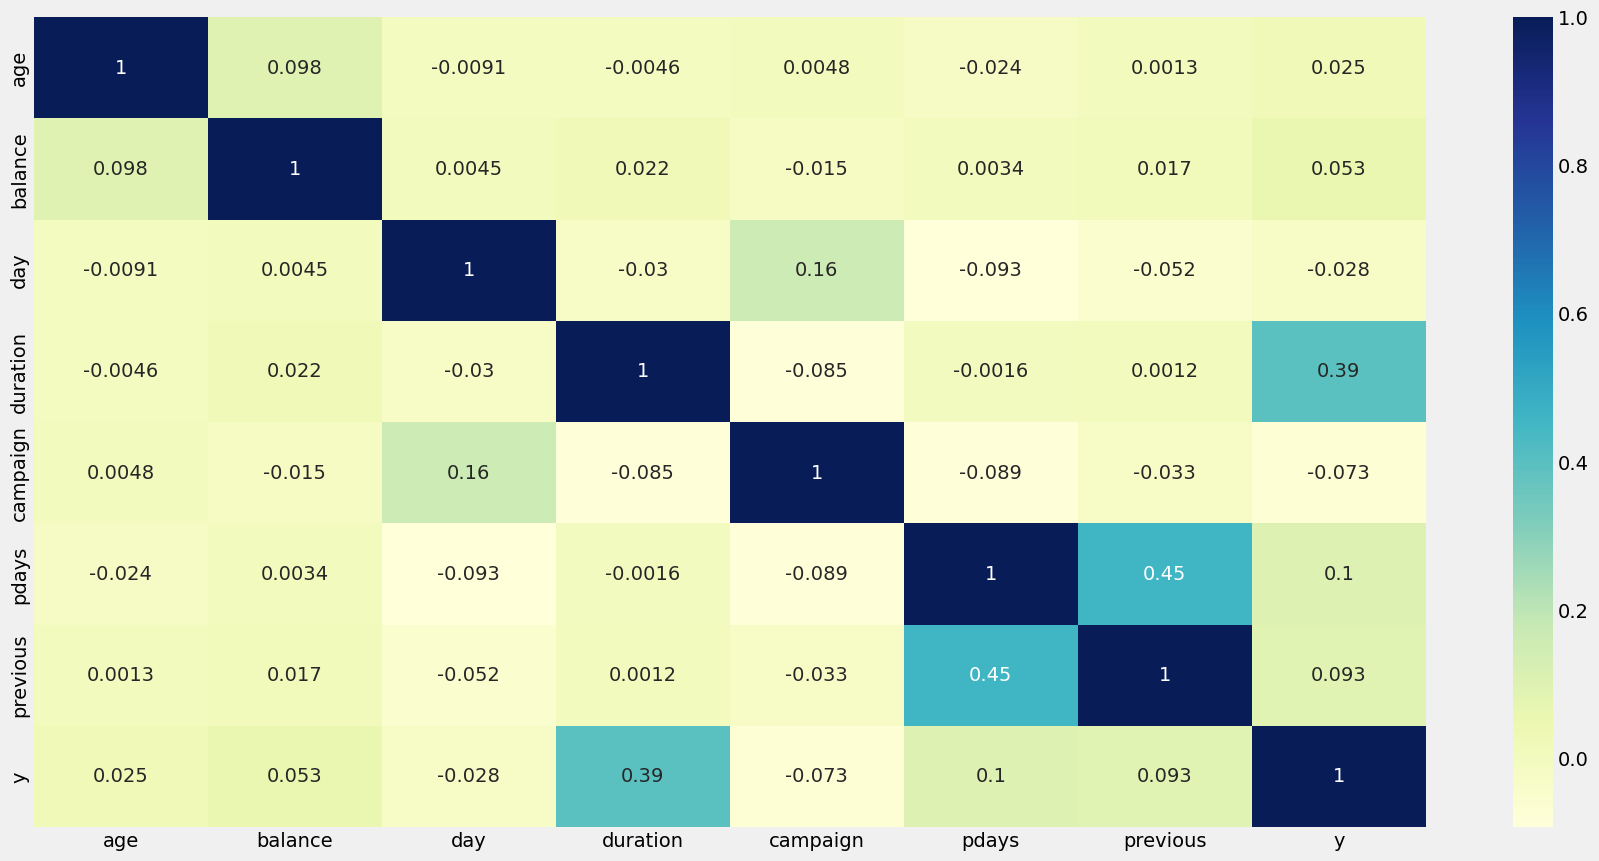

In [23]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(cor, annot=True, cmap='YlGnBu')

The duration of the call is highly correlated with the target variable. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

Categorical Features

Analysing th 'Job' variable

In [24]:
#Frequency table
df1['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

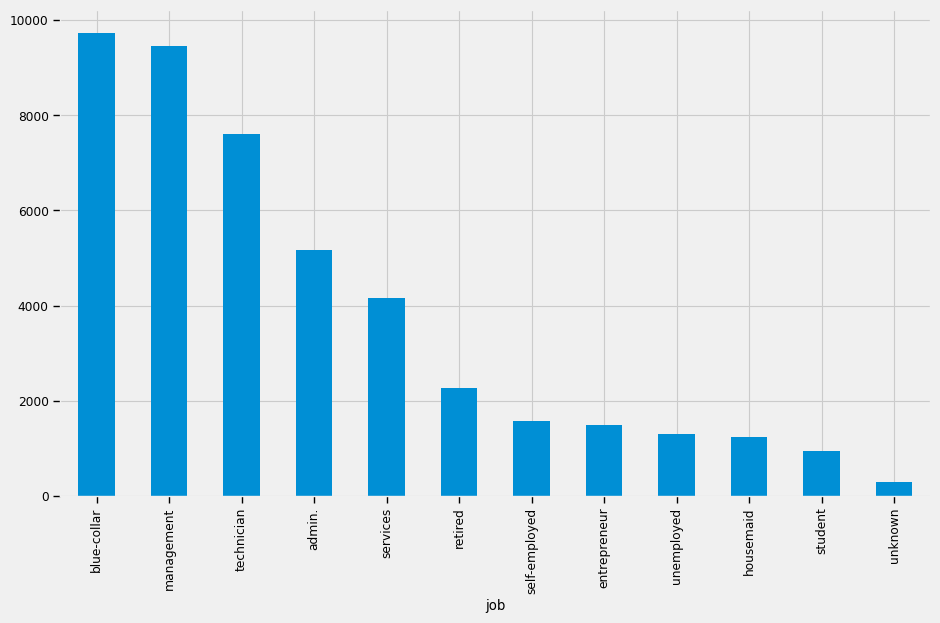

In [25]:
# Plotting the job frequency table
sns.set_context('paper')
df1['job'].value_counts().plot(kind='bar', figsize=(10,6));

Most of the clients belonged to blue-collar job and students are least in general as they don't make term deposits in general.

Analysis of 'marital' status

In [26]:
df1['marital'].value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

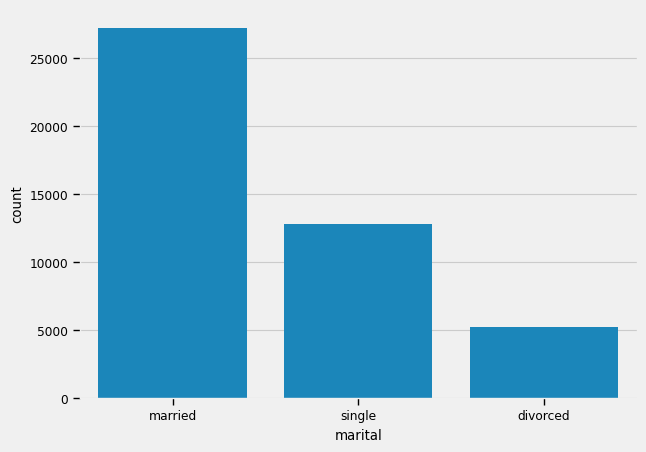

In [27]:
sns.countplot(data=df1, x='marital');

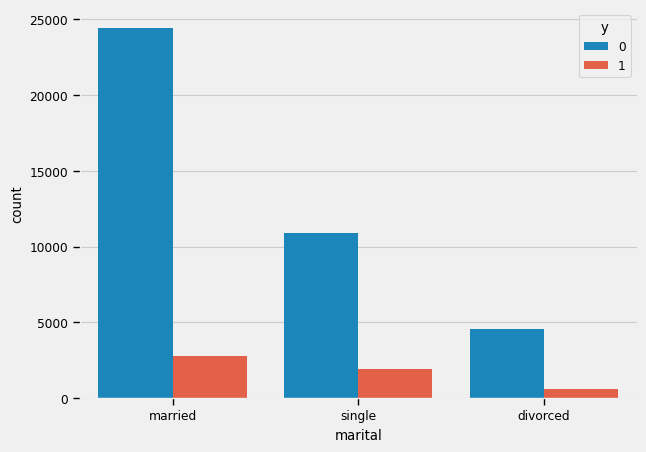

In [28]:
sns.countplot(data=df1, x='marital', hue='y');

from the above graph, married subscribed more to term deposit, followed by single, lastly divorced

In [29]:
df1['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

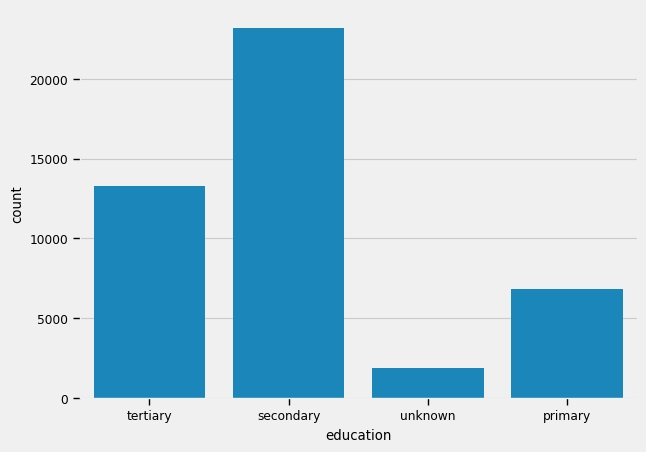

In [30]:
sns.countplot(data=df1, x='education');

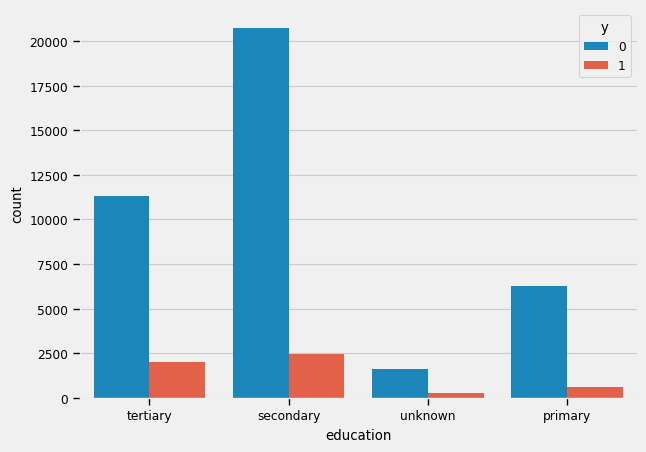

In [31]:
sns.countplot(data=df1, x='education', hue='y');

Customer who have Tertiary and secondary eduction subcribed to Term Deposits as compared to those who stopped at primary level.
This means, education level determines whether the customer will subscribe to term deposit or not 

In [32]:
df1['default'].value_counts()



default
no     44396
yes      815
Name: count, dtype: int64

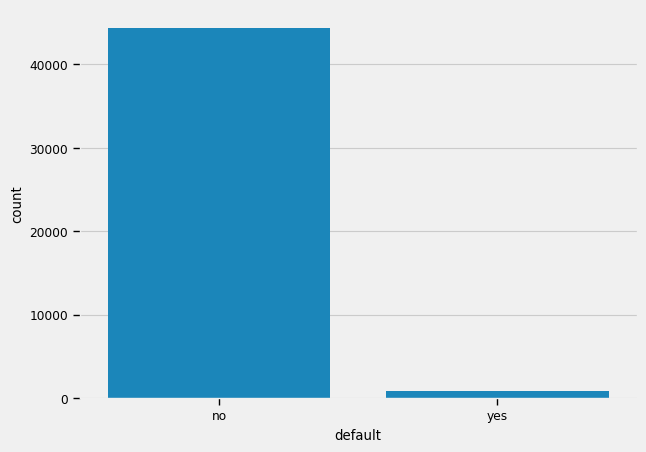

In [33]:
sns.countplot(data=df1, x='default');

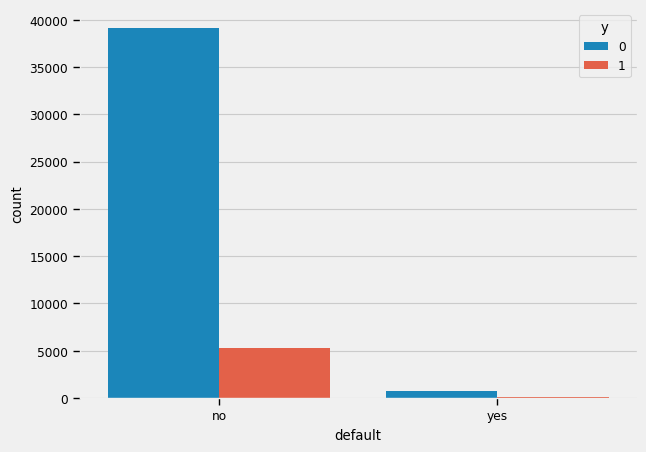

In [34]:
 sns.countplot(data=df1, x='default', hue='y');

All customer who defaulted didnt subscribe to Term Deposit

In [35]:
df1['housing'].value_counts()

housing
yes    25130
no     20081
Name: count, dtype: int64

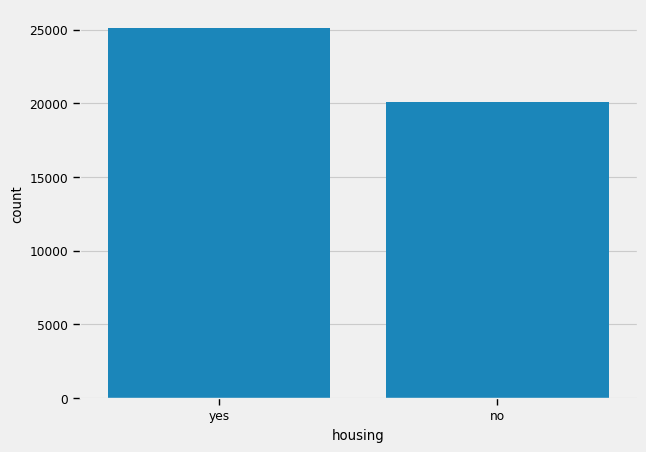

In [36]:
sns.countplot(data=df1, x='housing');

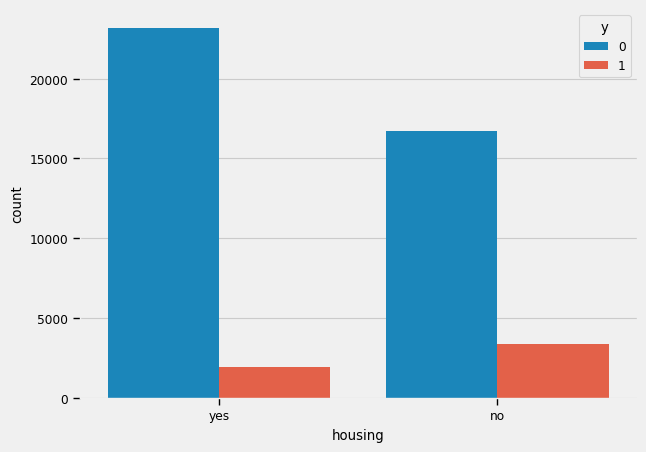

In [37]:
sns.countplot(data=df1, x='housing', hue='y');

Customer who have no housing loan subscribed most to Term deposit

Most of the customer have housing loans

In [38]:
df1['loan'].value_counts()



loan
no     37967
yes     7244
Name: count, dtype: int64

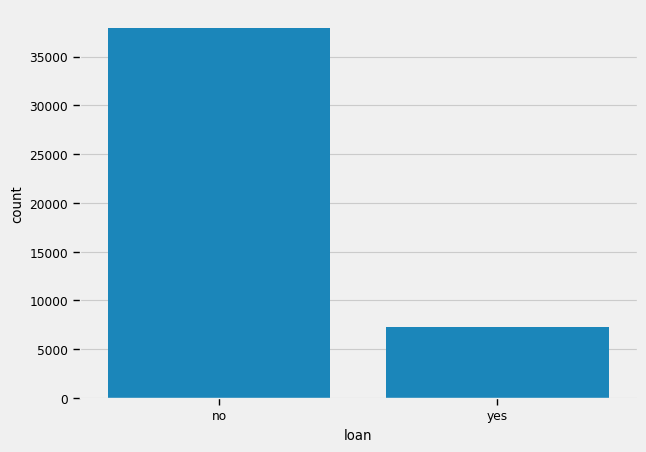

In [39]:
sns.countplot(data=df1, x='loan');

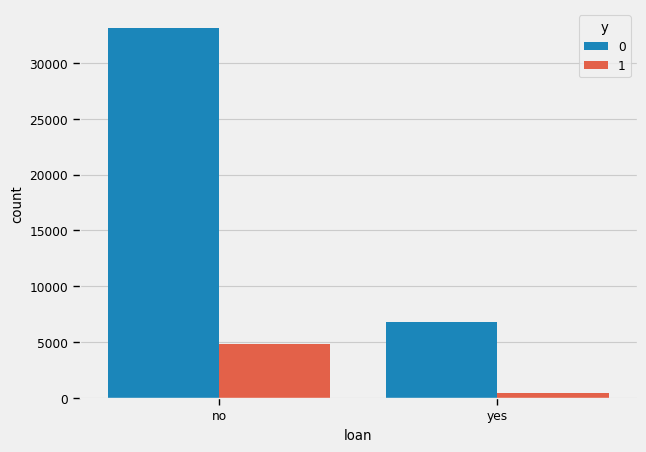

In [40]:
sns.countplot(data=df1, x='loan', hue='y');

Customers with no loans subscribed more to Term Deposits than those who have loans 

In [41]:
df1['contact'].value_counts()


contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

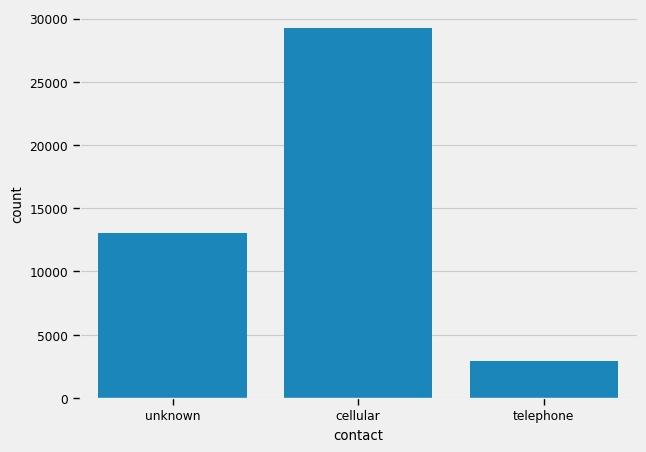

In [42]:
sns.countplot(data=df1, x='contact');


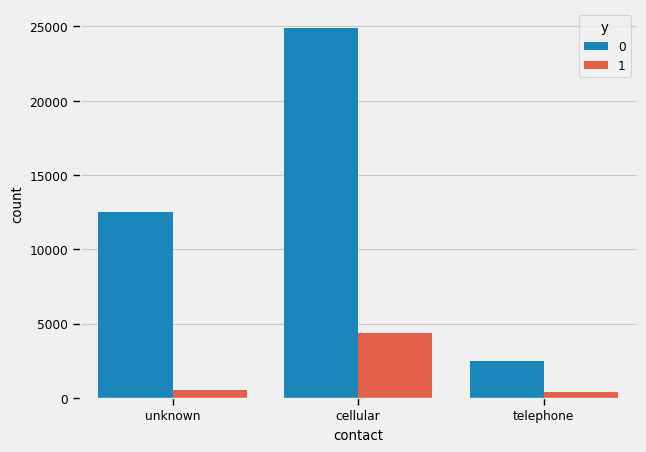

In [43]:
sns.countplot(data=df1, x='contact', hue='y');

Customer who were contacted using cellular phone subscribed more to Term Deposits 

In [44]:
df1['month'].value_counts()

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

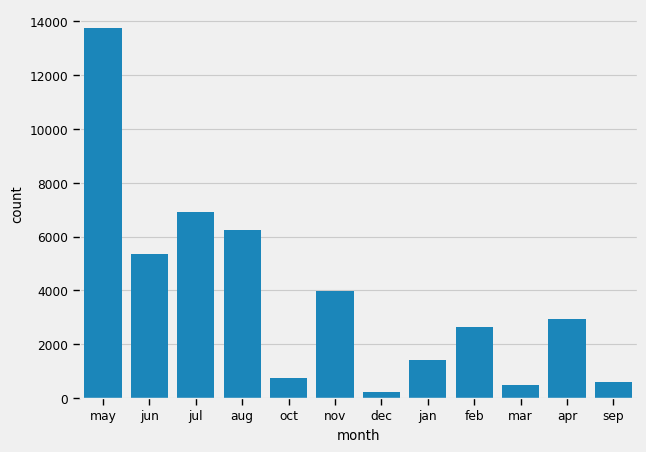

In [45]:
sns.countplot(data=df1, x='month');


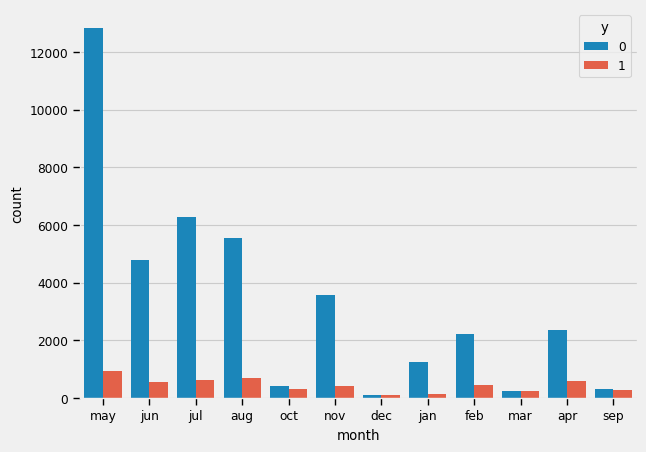

In [46]:
sns.countplot(data=df1, x='month', hue='y');

In [47]:
df1['poutcome'].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

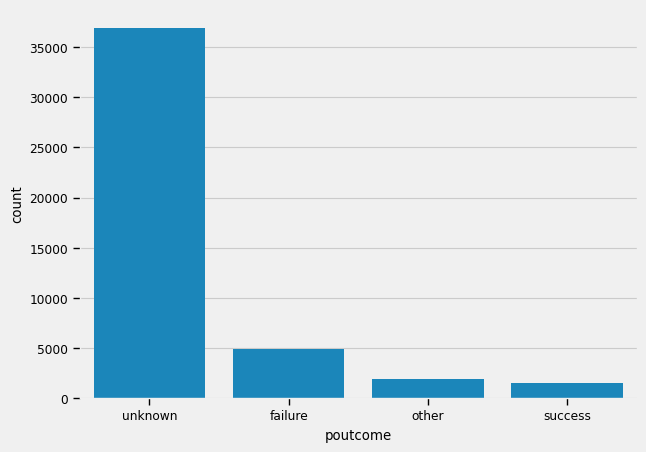

In [48]:
sns.countplot(data=df1, x='poutcome');


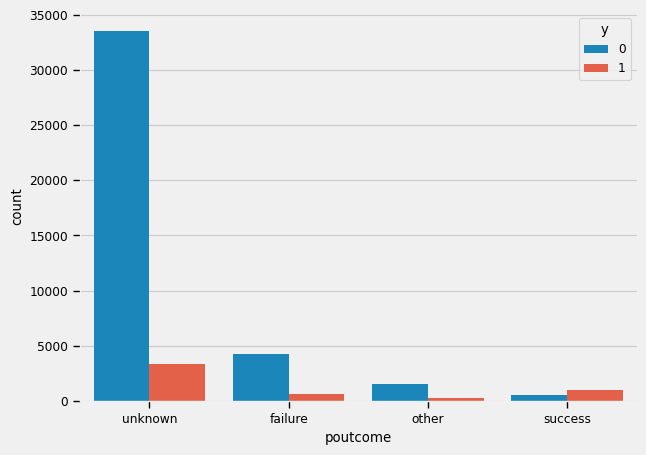

In [49]:
sns.countplot(data=df1, x='poutcome', hue='y');